<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Ori_R_version_in_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
print("Hello, R!")

[1] "Hello, R!"


In [4]:
%%R
# Import libraries
library(tools)
library(dplyr)
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
%%R
# Import data sources
df_global <- read.csv("/content/OxCGRT_compact_national_v1.csv")
df_usa <- read.csv("/content/OxCGRT_compact_subnational_v1.csv")

In [6]:
%%R
# Convert "Date" to date-time format
df_global$Date <- as.Date(as.character(df_global$Date), format = "%Y%m%d")
df_usa$Date <- as.Date(as.character(df_usa$Date), format = "%Y%m%d")

In [7]:
%%R
# list columns
colnames(df_global)

 [1] "CountryName"                                                                    
 [2] "CountryCode"                                                                    
 [3] "RegionName"                                                                     
 [4] "RegionCode"                                                                     
 [5] "Jurisdiction"                                                                   
 [6] "Date"                                                                           
 [7] "C1M_School.closing"                                                             
 [8] "C1M_Flag"                                                                       
 [9] "C2M_Workplace.closing"                                                          
[10] "C2M_Flag"                                                                       
[11] "C3M_Cancel.public.events"                                                       
[12] "C3M_Flag"                            

In [8]:
%%R
# show first few observations
df_global[1:6,]

  CountryName CountryCode RegionName RegionCode Jurisdiction       Date
1       Aruba         ABW         NA         NA    NAT_TOTAL 2020-01-01
2       Aruba         ABW         NA         NA    NAT_TOTAL 2020-01-02
3       Aruba         ABW         NA         NA    NAT_TOTAL 2020-01-03
4       Aruba         ABW         NA         NA    NAT_TOTAL 2020-01-04
5       Aruba         ABW         NA         NA    NAT_TOTAL 2020-01-05
6       Aruba         ABW         NA         NA    NAT_TOTAL 2020-01-06
  C1M_School.closing C1M_Flag C2M_Workplace.closing C2M_Flag
1                  0       NA                     0       NA
2                  0       NA                     0       NA
3                  0       NA                     0       NA
4                  0       NA                     0       NA
5                  0       NA                     0       NA
6                  0       NA                     0       NA
  C3M_Cancel.public.events C3M_Flag C4M_Restrictions.on.gatherings C4

In [9]:
%%R
# What "jurisdictions" do we have?
unique(df_global$Jurisdiction)

## It looks like none of the policies are divided into subnational levels in this dataset!

[1] "NAT_TOTAL"


In [15]:
%%R
# What countries are represented in the global data?
unique(df_global$CountryName)

  [1] "Aruba"                        "Afghanistan"                 
  [3] "Angola"                       "Albania"                     
  [5] "Andorra"                      "United Arab Emirates"        
  [7] "Argentina"                    "Australia"                   
  [9] "Austria"                      "Azerbaijan"                  
 [11] "Burundi"                      "Belgium"                     
 [13] "Benin"                        "Burkina Faso"                
 [15] "Bangladesh"                   "Bulgaria"                    
 [17] "Bahrain"                      "Bahamas"                     
 [19] "Bosnia and Herzegovina"       "Belarus"                     
 [21] "Belize"                       "Bermuda"                     
 [23] "Bolivia"                      "Brazil"                      
 [25] "Barbados"                     "Brunei"                      
 [27] "Bhutan"                       "Botswana"                    
 [29] "Central African Republic"     "Canada"   

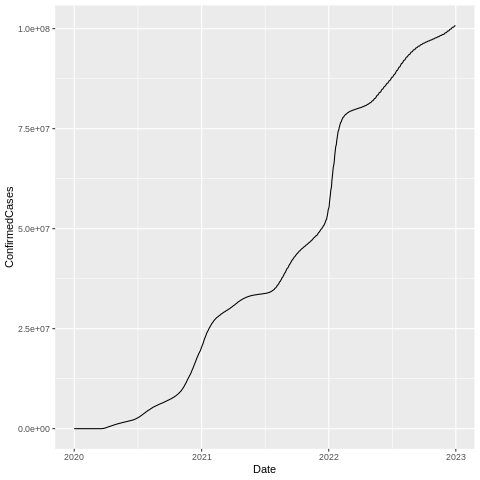

In [19]:
%%R
# Total number of confirmed cases in USA over time
usa_cases <- ggplot(data=filter(df_global, CountryName=="United States"), aes(x=Date, y=ConfirmedCases)) +
  geom_line()
usa_cases

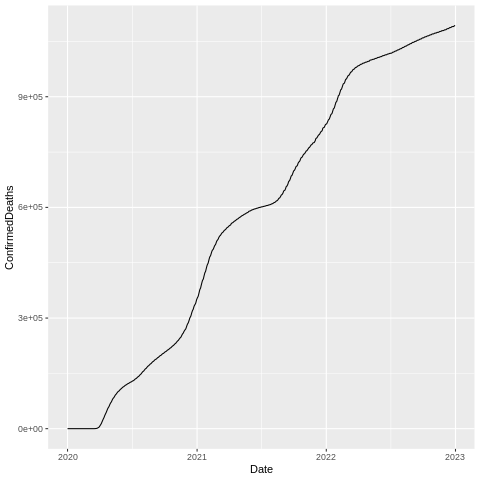

In [23]:
%%R
# Total number of covid deaths in America overtime
usa_deaths <- ggplot(data=filter(df_global, CountryName=="United States"), aes(x=Date, y=ConfirmedDeaths)) +
  geom_line()
usa_deaths

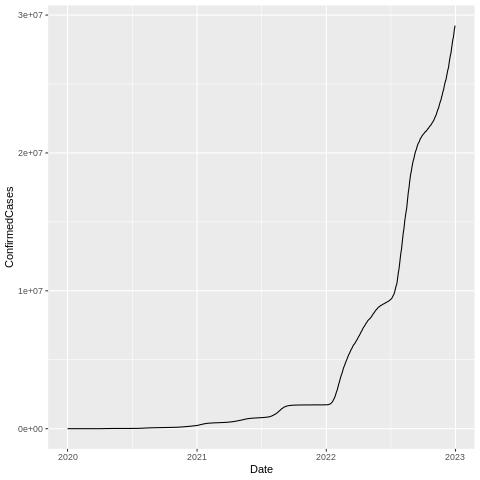

In [18]:
%%R
# Total number of confirmed cases in Japan over time
japan_cases <- ggplot(data=filter(df_global, CountryName=="Japan"), aes(x=Date, y=ConfirmedCases)) +
  geom_line()
japan_cases

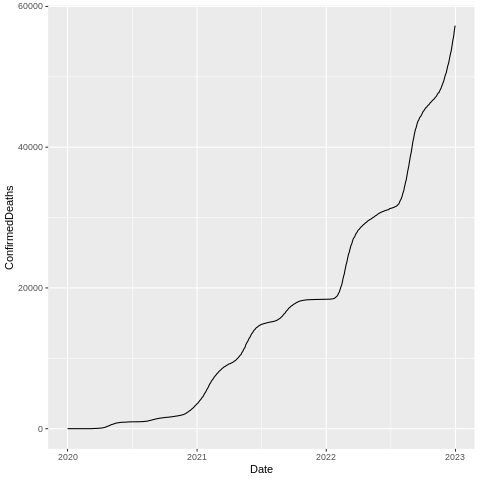

In [22]:
%%R
# Total number of covid deaths in Japan overtime
japan_deaths <- ggplot(data=filter(df_global, CountryName=="Japan"), aes(x=Date, y=ConfirmedDeaths)) +
  geom_line()
japan_deaths

In [11]:
%%R
### USA Data columns
colnames(df_usa)

 [1] "CountryName"                                                                    
 [2] "CountryCode"                                                                    
 [3] "RegionName"                                                                     
 [4] "RegionCode"                                                                     
 [5] "CityName"                                                                       
 [6] "CityCode"                                                                       
 [7] "Jurisdiction"                                                                   
 [8] "Date"                                                                           
 [9] "C1M_School.closing"                                                             
[10] "C1M_Flag"                                                                       
[11] "C2M_Workplace.closing"                                                          
[12] "C2M_Flag"                            

In [12]:
%%R
# Show some example rows
df_usa[1:6,]

  CountryName CountryCode RegionName RegionCode CityName CityCode Jurisdiction
1   Australia         AUS                                            NAT_TOTAL
2   Australia         AUS                                            NAT_TOTAL
3   Australia         AUS                                            NAT_TOTAL
4   Australia         AUS                                            NAT_TOTAL
5   Australia         AUS                                            NAT_TOTAL
6   Australia         AUS                                            NAT_TOTAL
        Date C1M_School.closing C1M_Flag C2M_Workplace.closing C2M_Flag
1 2020-01-01                  0       NA                     0       NA
2 2020-01-02                  0       NA                     0       NA
3 2020-01-03                  0       NA                     0       NA
4 2020-01-04                  0       NA                     0       NA
5 2020-01-05                  0       NA                     0       NA
6 2020-01-06   

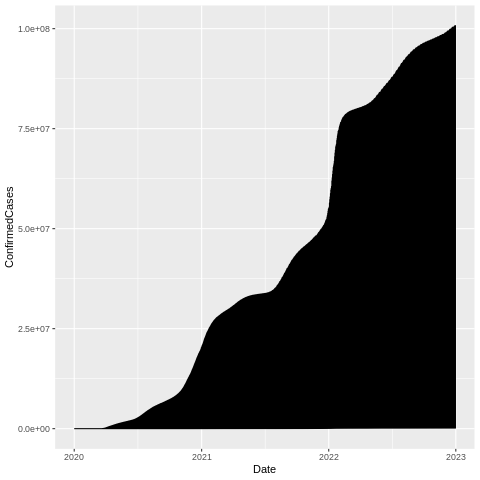

In [14]:
%%R
# Total number of covid cases in the USA over time
usa_cases <- ggplot(data=filter(df_usa, CountryName=="United States"), aes(x=Date, y=ConfirmedCases)) +
  geom_line()
usa_cases


